In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/CSE428/sports.csv'
train_data = '/content/drive/MyDrive/CSE428/train'
test_data = '/content/drive/MyDrive/CSE428/test'
val_data = '/content/drive/MyDrive/CSE428/valid'

In [ ]:

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pandas as pd

In [ ]:

# Parameters
input_shape = (224, 224, 3)
num_classes = 100
batch_size = 32
epochs = 15


train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # we are keeping 20% of the data for validation
)


train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)


validation_generator = train_datagen.flow_from_directory(
    val_data,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# CNN model that we'll be using for the classification task
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.summary()

# Training  the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


model.save('sports_classification_cnn.h5')


test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)
#evaluating the find accuracy of all the tests
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

train_loss, train_accuracy = model.evaluate(train_generator)
print(f'Train accuracy: {train_accuracy * 100:.2f}%')

validation_loss, validation_accuracy = model.evaluate(validation_generator)
print(f'Validation accuracy: {validation_accuracy * 100:.2f}%')





Found 10834 images belonging to 100 classes.
Found 100 images belonging to 100 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       9,437,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          51,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,729,828 (37.12 MB)

 Trainable params: 9,729,828 (37.12 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


338/338 ━━━━━━━━━━━━━━━━━━━━ 3458s 10s/step - accuracy: 0.0290 - loss: 4.4993 - val_accuracy: 0.1042 - val_loss: 3.8206
Epoch 2/15
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 447us/step - accuracy: 0.1250 - loss: 3.7891 - val_accuracy: 0.0000e+00 - val_loss: 4.4776
Epoch 3/15


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


338/338 ━━━━━━━━━━━━━━━━━━━━ 1545s 5s/step - accuracy: 0.1303 - loss: 3.6953 - val_accuracy: 0.3125 - val_loss: 2.8164
Epoch 4/15
338/338 ━━━━━━━━━━━━━━━━━━━━ 5s 379us/step - accuracy: 0.1875 - loss: 3.2406 - val_accuracy: 0.2500 - val_loss: 2.8407
Epoch 5/15
338/338 ━━━━━━━━━━━━━━━━━━━━ 1564s 5s/step - accuracy: 0.2723 - loss: 2.8682 - val_accuracy: 0.3333 - val_loss: 2.4263
Epoch 6/15
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 410us/step - accuracy: 0.2188 - loss: 3.2146 - val_accuracy: 0.5000 - val_loss: 1.6648
Epoch 7/15
338/338 ━━━━━━━━━━━━━━━━━━━━ 1577s 5s/step - accuracy: 0.3898 - loss: 2.3610 - val_accuracy: 0.3854 - val_loss: 2.3327
Epoch 8/15
338/338 ━━━━━━━━━━━━━━━━━━━━ 5s 405us/step - accuracy: 0.4375 - loss: 2.3294 - val_accuracy: 0.7500 - val_loss: 1.4080
Epoch 9/15
338/338 ━━━━━━━━━━━━━━━━━━━━ 1541s 5s/step - accuracy: 0.4789 - loss: 1.9904 - val_accuracy: 0.5104 - val_loss: 1.8329
Epoch 10/15
338/338 ━━━━━━━━━━━━━━━━━━━━ 6s 406us/step - accuracy: 0.4375 - loss: 1.9415 - val_accura

Found 500 images belonging to 100 classes.
16/16 ━━━━━━━━━━━━━━━━━━━━ 120s 8s/step - accuracy: 0.5065 - loss: 2.0047
Test accuracy: 51.00%
339/339 ━━━━━━━━━━━━━━━━━━━━ 568s 2s/step - accuracy: 0.7210 - loss: 0.9921
Train accuracy: 71.86%
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 859ms/step - accuracy: 0.5295 - loss: 1.8072
Validation accuracy: 54.00%


##   Model Architecture Diagram

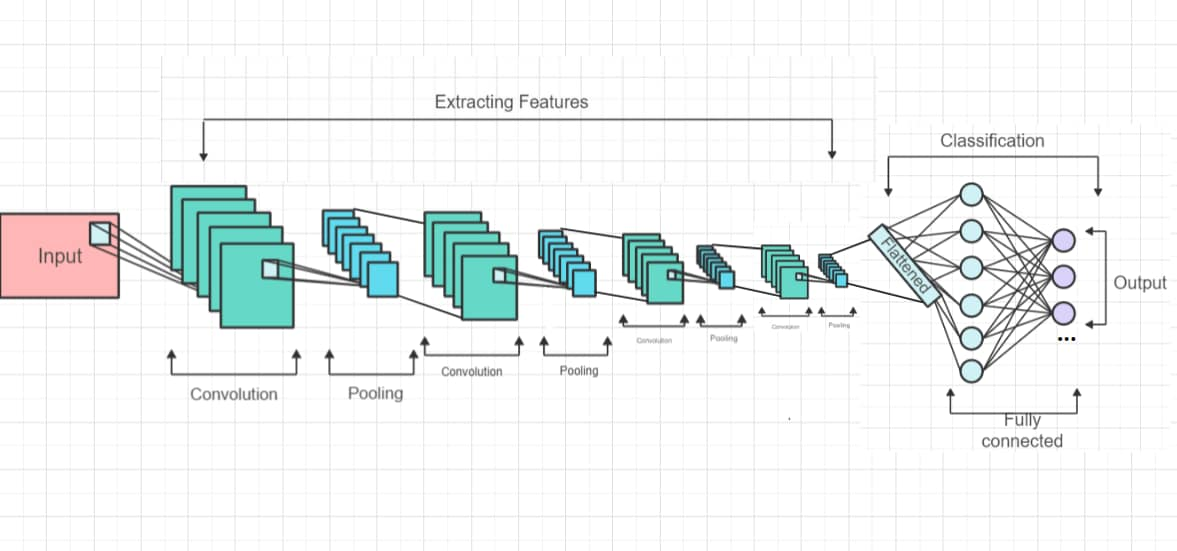

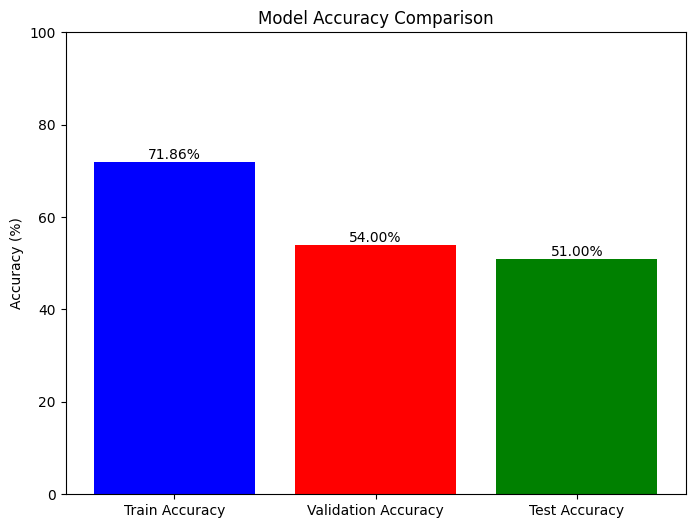

In [ ]:

accuracy_values = [train_accuracy * 100, validation_accuracy * 100, test_accuracy * 100]
labels = ['Train Accuracy', 'Validation Accuracy', 'Test Accuracy']

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracy_values, color=['blue', 'red', 'green'])


plt.ylim(0, 100)
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')


for i in range(len(accuracy_values)):
    plt.text(i, accuracy_values[i], f'{accuracy_values[i]:.2f}%', ha='center', va='bottom')


plt.show()

# **Accuracy of the three sets:**



*   Train Accuracy:71.86%

*   Validation Accuracy:54.00%


*   Test Accuracy:51.00%







# **To Visualize Good and Bad Test Examples :**

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


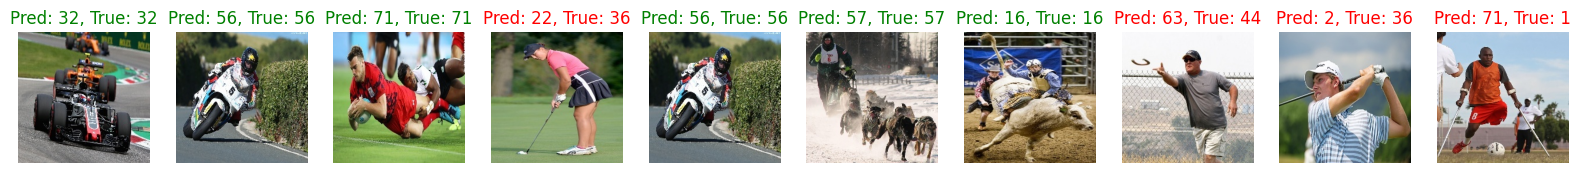

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


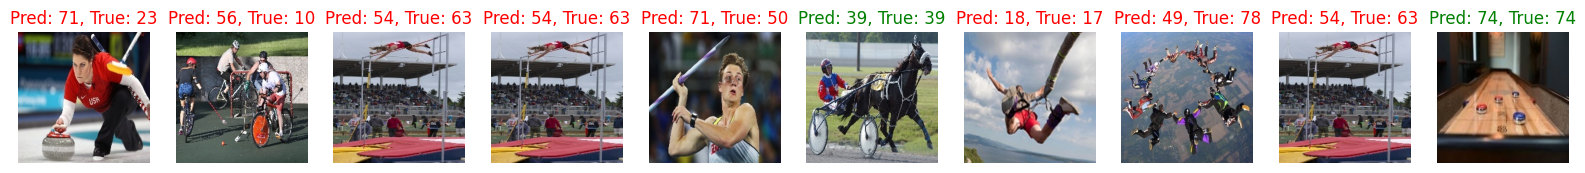

In [ ]:

import random
def visualize_examples(generator, show_exp=10, correct=True):
    batch = next(generator)
    img, label = batch[0], batch[1]
    pred = model.predict(img)
    plt.figure(figsize=(20, 20))
    for i in range(show_exp):
        idx = random.randint(0, len(img)-1)
        plt.subplot(1, show_exp, i+1)
        plt.imshow(img[idx])
        pred_class = np.argmax(pred[idx])
        true_class = np.argmax(label[idx])
        color = 'green' if pred_class == true_class else 'red'
        plt.title(f'Pred: {pred_class}, True: {true_class}', color=color)
        plt.axis('off')
    plt.show()

# to show good examples
visualize_examples(test_generator, correct=True)

# to show bad examples
visualize_examples(test_generator, correct=False)



# **Why the model is performing badly?**
The model is underperforming because there might be a class imbalance in the training set. So, if some particular classes have fewer class examples the model will not be able to generalize it well.
Another reason could be that we didn’t add any regularization techniques leading the model to become too flexible and overfit on the training data and generalizing poorly. Therefore, since the model is overfitting, a simpler model could have been used


16/16 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step


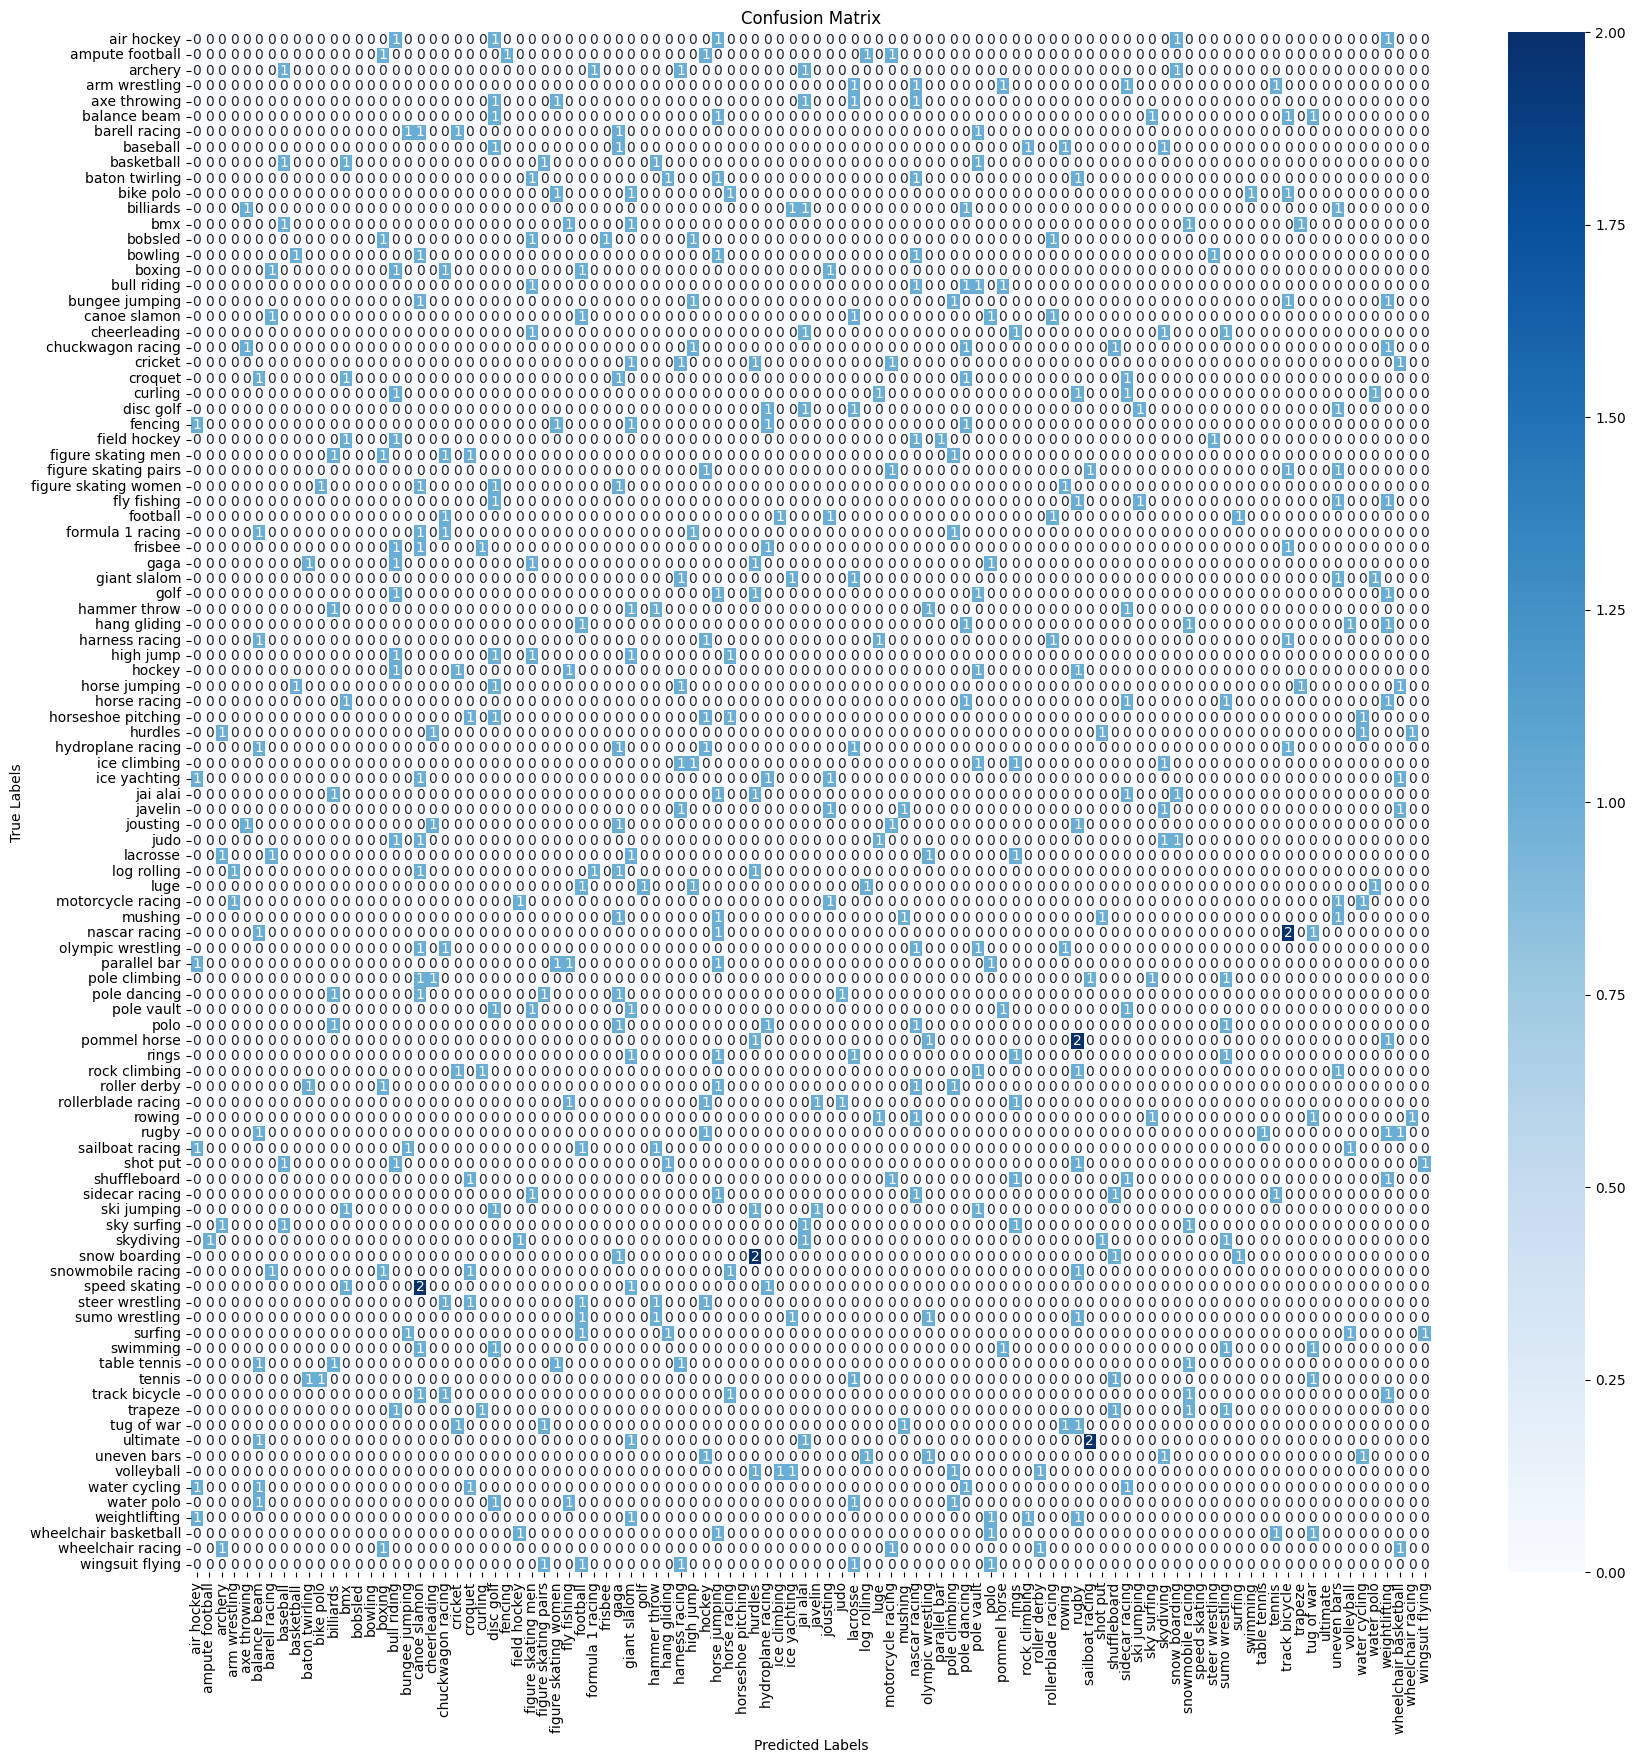

In [ ]:

preds = model.predict(test_generator)
y_pred_label = np.argmax(preds, axis=1)
y_true_label = test_generator.classes

class_labels = list(test_generator.class_indices.keys())


conf_mat = confusion_matrix(y_true_label, y_pred_label)

plt.figure(figsize=(20, 20))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()



# **Performance of all the classes:**

16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


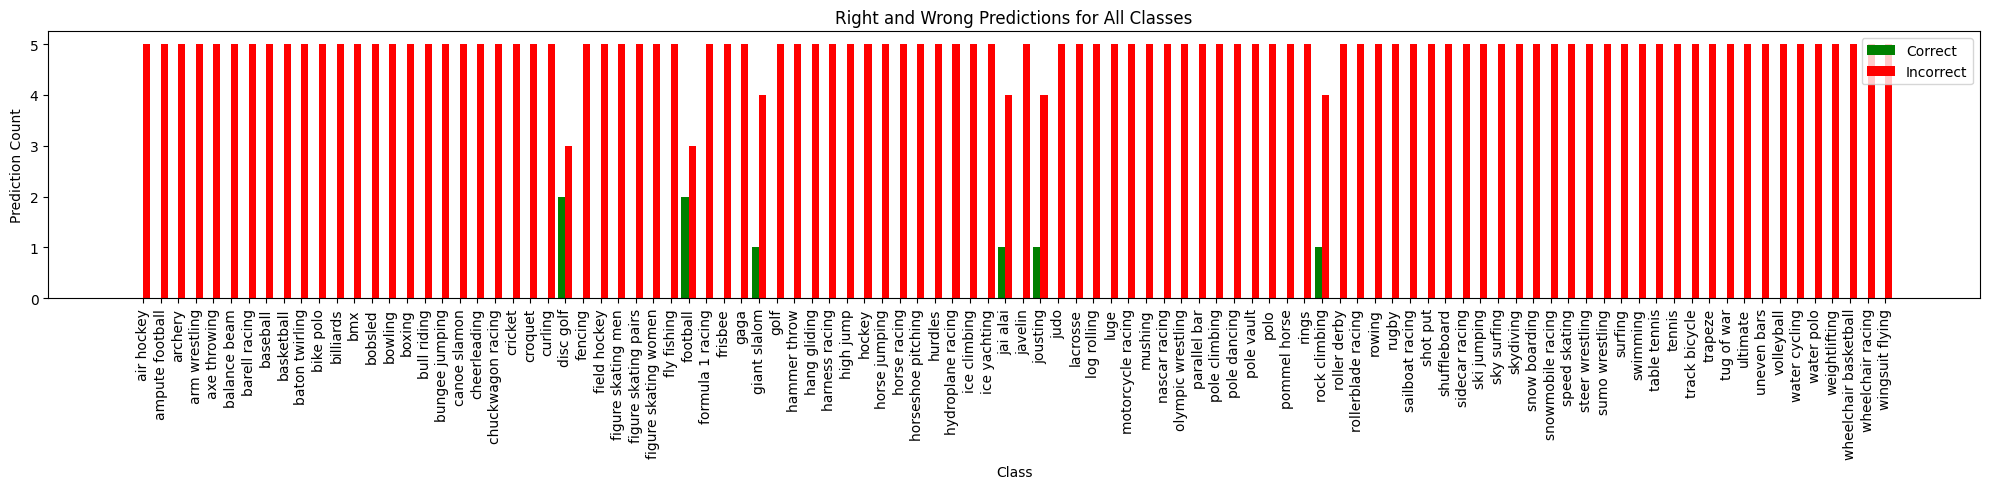

In [ ]:


predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

true_labels = test_generator.classes

labels_list = list(test_generator.class_indices.keys())


results_df = pd.DataFrame({
    'Actual': true_labels,
    'Predicted': predicted_labels
})

results_df['Is_Correct'] = results_df['Actual'] == results_df['Predicted']


correct_predictions = results_df[results_df['Is_Correct']].groupby('Actual').size()
incorrect_predictions = results_df[~results_df['Is_Correct']].groupby('Actual').size()

correct_predictions = correct_predictions.reindex(np.arange(len(labels_list)), fill_value=0)
incorrect_predictions = incorrect_predictions.reindex(np.arange(len(labels_list)), fill_value=0)


plt.figure(figsize=(20, 5))
width = 0.4
positions = np.arange(len(labels_list))
plt.bar(positions, correct_predictions, width=width, label='Correct', color='green')
plt.bar(positions + width, incorrect_predictions, width=width, label='Incorrect', color='red')
plt.xlabel('Class')
plt.ylabel('Prediction Count')
plt.title('Right and Wrong Predictions for All Classes')
plt.xticks(positions + width / 2, labels_list, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


# **Is the performance equally good in all classes? Which classes are underperforming and why?**

No, performance is not equally good for all classes. In fact, most of the classes are underperforming except the classes - **disc golf,football,jai alai,jousting and rock climbing**. The reasons for this might be:

1) Poor feature engineering and presence of more irrelevant features in the data of those classes.

2)Class Imbalance where some classes having significantly fewer examples than other classes.

3)Poor data quality due to addition of noise in the examples of those classes.

4)Overlapping of features of different classes making it difficult for the model to distinguish between the classes.